# load data 

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

In [2]:
link_t = '/kaggle/input/ddsm-classification-cancer/detect_classification/'
train_link = os.listdir('/kaggle/input/ddsm-classification-cancer/detect_classification')
train_link = pd.DataFrame(train_link, columns=['fileName'])
train_link['link'] = train_link['fileName'].apply(lambda x: link_t + x)
train_link

,fileName,link
0,A_1830_1.LEFT_CC.jpg,/kaggle/input/ddsm-classification-cancer/detec...
1,D_4097_1.LEFT_CC_copy.jpg,/kaggle/input/ddsm-classification-cancer/detec...
2,B_3511_1.RIGHT_MLO_copy.jpg,/kaggle/input/ddsm-classification-cancer/detec...
3,B_3467_1.LEFT_MLO_copy.jpg,/kaggle/input/ddsm-classification-cancer/detec...
4,D_4082_1.LEFT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...
...,...,...
4732,B_3065_1.RIGHT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...
4733,C_0217_1.RIGHT_MLO_copy.jpg,/kaggle/input/ddsm-classification-cancer/detec...
4734,D_4002_1.LEFT_CC.jpg,/kaggle/input/ddsm-classification-cancer/detec...
4735,C_0150_1.LEFT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...


In [3]:
link_v = '/kaggle/input/ddsm-yolo-512/ddsm_512/val/images/'
val_link = os.listdir('/kaggle/input/ddsm-yolo-512/ddsm_512/val/images')
val_link = pd.DataFrame(val_link, columns=['fileName'])
val_link['link'] = val_link['fileName'].apply(lambda x: link_v + x)
val_link

,fileName,link
0,A_0504_1.LEFT_MLO.jpg,/kaggle/input/ddsm-yolo-512/ddsm_512/val/image...
1,D_4082_1.LEFT_MLO.jpg,/kaggle/input/ddsm-yolo-512/ddsm_512/val/image...
2,A_0541_1.LEFT_CC.jpg,/kaggle/input/ddsm-yolo-512/ddsm_512/val/image...
3,A_1629_1.RIGHT_MLO.jpg,/kaggle/input/ddsm-yolo-512/ddsm_512/val/image...
4,C_0313_1.LEFT_MLO.jpg,/kaggle/input/ddsm-yolo-512/ddsm_512/val/image...
...,...,...
2089,A_0543_1.RIGHT_MLO.jpg,/kaggle/input/ddsm-yolo-512/ddsm_512/val/image...
2090,D_4066_1.RIGHT_MLO.jpg,/kaggle/input/ddsm-yolo-512/ddsm_512/val/image...
2091,A_1763_1.LEFT_CC.jpg,/kaggle/input/ddsm-yolo-512/ddsm_512/val/image...
2092,A_0145_1.RIGHT_MLO.jpg,/kaggle/input/ddsm-yolo-512/ddsm_512/val/image...


In [4]:
# link_image = pd.concat([train_link, val_link])
link_image = train_link
link_image['mask'] = link_image['fileName'].apply(lambda x: x.split('_')[-1:][0])
link_image

,fileName,link,mask
0,A_1830_1.LEFT_CC.jpg,/kaggle/input/ddsm-classification-cancer/detec...,CC.jpg
1,D_4097_1.LEFT_CC_copy.jpg,/kaggle/input/ddsm-classification-cancer/detec...,copy.jpg
2,B_3511_1.RIGHT_MLO_copy.jpg,/kaggle/input/ddsm-classification-cancer/detec...,copy.jpg
3,B_3467_1.LEFT_MLO_copy.jpg,/kaggle/input/ddsm-classification-cancer/detec...,copy.jpg
4,D_4082_1.LEFT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...,MLO.jpg
...,...,...,...
4732,B_3065_1.RIGHT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...,MLO.jpg
4733,C_0217_1.RIGHT_MLO_copy.jpg,/kaggle/input/ddsm-classification-cancer/detec...,copy.jpg
4734,D_4002_1.LEFT_CC.jpg,/kaggle/input/ddsm-classification-cancer/detec...,CC.jpg
4735,C_0150_1.LEFT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...,MLO.jpg


In [2]:
df = pd.read_excel('/kaggle/input/miniddsm2/MINI-DDSM-Complete-JPEG-8/DataWMask.xlsx')
df

,fullPath,fileName,View,Side,Status,Tumour_Contour,Tumour_Contour2,Age,Density
0,Benign\0029\C_0029_1.LEFT_CC.jpg,C_0029_1.LEFT_CC.jpg,CC,LEFT,Benign,Benign\0029\C_0029_1.LEFT_CC_Mask.jpg,-,66.0,3
1,Benign\0029\C_0029_1.LEFT_MLO.jpg,C_0029_1.LEFT_MLO.jpg,MLO,LEFT,Benign,Benign\0029\C_0029_1.LEFT_MLO_Mask.jpg,-,66.0,3
2,Benign\0029\C_0029_1.RIGHT_CC.jpg,C_0029_1.RIGHT_CC.jpg,CC,RIGHT,Benign,-,-,66.0,3
3,Benign\0029\C_0029_1.RIGHT_MLO.jpg,C_0029_1.RIGHT_MLO.jpg,MLO,RIGHT,Benign,-,-,66.0,3
4,Benign\0033\C_0033_1.LEFT_CC.jpg,C_0033_1.LEFT_CC.jpg,CC,LEFT,Benign,-,-,60.0,3
...,...,...,...,...,...,...,...,...,...
7803,Normal\4607\D_4607_1.RIGHT_MLO.jpg,D_4607_1.RIGHT_MLO.jpg,MLO,RIGHT,Normal,-,-,41.0,1
7804,Normal\4608\D_4608_1.LEFT_CC.jpg,D_4608_1.LEFT_CC.jpg,CC,LEFT,Normal,-,-,39.0,2
7805,Normal\4608\D_4608_1.LEFT_MLO.jpg,D_4608_1.LEFT_MLO.jpg,MLO,LEFT,Normal,-,-,39.0,2
7806,Normal\4608\D_4608_1.RIGHT_CC.jpg,D_4608_1.RIGHT_CC.jpg,CC,RIGHT,Normal,-,-,39.0,2


In [3]:
link_t = '/kaggle/input/ddsm-classification-cancer/detect_classification/'
link_image = os.listdir('/kaggle/input/ddsm-classification-cancer/detect_classification')
link_image = pd.DataFrame(link_image, columns=['fileName'])
link_image['link'] = link_image['fileName'].apply(lambda x: link_t + x)
link_image['mask'] = link_image['fileName'].apply(lambda x: x.split('_')[-1:][0])
link_image['fileName'] = link_image['fileName'].apply(lambda x: x.replace('_copy',''))
link_image

,fileName,link,mask
0,A_1830_1.LEFT_CC.jpg,/kaggle/input/ddsm-classification-cancer/detec...,CC.jpg
1,D_4097_1.LEFT_CC.jpg,/kaggle/input/ddsm-classification-cancer/detec...,copy.jpg
2,B_3511_1.RIGHT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...,copy.jpg
3,B_3467_1.LEFT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...,copy.jpg
4,D_4082_1.LEFT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...,MLO.jpg
...,...,...,...
4732,B_3065_1.RIGHT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...,MLO.jpg
4733,C_0217_1.RIGHT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...,copy.jpg
4734,D_4002_1.LEFT_CC.jpg,/kaggle/input/ddsm-classification-cancer/detec...,CC.jpg
4735,C_0150_1.LEFT_MLO.jpg,/kaggle/input/ddsm-classification-cancer/detec...,MLO.jpg


In [4]:
df_concat = pd.merge(df, link_image, on="fileName")
df_concat = df_concat[['fileName', 'Status', 'link']]
df_concat

,fileName,Status,link
0,C_0029_1.LEFT_CC.jpg,Benign,/kaggle/input/ddsm-classification-cancer/detec...
1,C_0029_1.LEFT_CC.jpg,Benign,/kaggle/input/ddsm-classification-cancer/detec...
2,C_0029_1.LEFT_MLO.jpg,Benign,/kaggle/input/ddsm-classification-cancer/detec...
3,C_0029_1.LEFT_MLO.jpg,Benign,/kaggle/input/ddsm-classification-cancer/detec...
4,C_0033_1.RIGHT_CC.jpg,Benign,/kaggle/input/ddsm-classification-cancer/detec...
...,...,...,...
4732,D_4193_1.LEFT_MLO.jpg,Cancer,/kaggle/input/ddsm-classification-cancer/detec...
4733,D_4193_1.LEFT_MLO.jpg,Cancer,/kaggle/input/ddsm-classification-cancer/detec...
4734,D_4199_1.RIGHT_CC.jpg,Cancer,/kaggle/input/ddsm-classification-cancer/detec...
4735,D_4199_1.RIGHT_MLO.jpg,Cancer,/kaggle/input/ddsm-classification-cancer/detec...


In [5]:
label_map = {"Benign": 0, "Cancer": 1}
text_labels = df_concat['Status'].values

# def mapping lable
def apply_mapping(label):
    return label_map.get(label, -1)

int_labels = list(map(apply_mapping, text_labels))

df_concat['labels'] = int_labels
df_concat

,fileName,Status,link,labels
0,C_0029_1.LEFT_CC.jpg,Benign,/kaggle/input/ddsm-classification-cancer/detec...,0
1,C_0029_1.LEFT_CC.jpg,Benign,/kaggle/input/ddsm-classification-cancer/detec...,0
2,C_0029_1.LEFT_MLO.jpg,Benign,/kaggle/input/ddsm-classification-cancer/detec...,0
3,C_0029_1.LEFT_MLO.jpg,Benign,/kaggle/input/ddsm-classification-cancer/detec...,0
4,C_0033_1.RIGHT_CC.jpg,Benign,/kaggle/input/ddsm-classification-cancer/detec...,0
...,...,...,...,...
4732,D_4193_1.LEFT_MLO.jpg,Cancer,/kaggle/input/ddsm-classification-cancer/detec...,1
4733,D_4193_1.LEFT_MLO.jpg,Cancer,/kaggle/input/ddsm-classification-cancer/detec...,1
4734,D_4199_1.RIGHT_CC.jpg,Cancer,/kaggle/input/ddsm-classification-cancer/detec...,1
4735,D_4199_1.RIGHT_MLO.jpg,Cancer,/kaggle/input/ddsm-classification-cancer/detec...,1


In [6]:
from sklearn.model_selection import train_test_split

# X là tập dữ liệu gốc, y là nhãn tương ứng
X_train, X_test, y_train, y_test = train_test_split(df_concat['link'].values, df_concat['labels'].values, test_size=0.2, random_state=42)


In [22]:
import skimage
x=[]
for i in df_concat['link'].values:
    img = skimage.io.imread(i,as_gray=True)
    img = cv2.resize(img, (32, 32))
    x.append(img)

In [23]:
X_train = np.array(x)
X_train = X_train.reshape(X_train.shape[0],32, 32)
X_train = X_train.astype('float32')

In [24]:
X_train = np.stack((X_train,)*3, axis=-1)
X_train, X_test, y_train, y_test = train_test_split(X_train, df_concat['labels'].values, test_size=0.2, random_state=42)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, 
                                            verbose=1,factor=0.3, min_lr=0.001)

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001), metrics = ['acc'])
history = model.fit(X_train, y_train, batch_size = 8 , epochs = 50, 
                    validation_data = (X_test,  y_test),callbacks = [learning_rate_reduction])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                173088    
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [9]:
import keras
from tensorflow.keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM, Bidirectional, Conv1D, concatenate, Permute, Dropout

lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(64,64)))
lstm_model.add(Dense(1024, activation = 'softmax'))
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               66000     
_________________________________________________________________
dense (Dense)                (None, 1024)              103424    
Total params: 169,424
Trainable params: 169,424
Non-trainable params: 0
_________________________________________________________________


In [10]:
feature_lstm = lstm_model.predict(X_train)

In [11]:
!pip install keras

In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [13]:
X_train = np.stack((X_train,)*3, axis=-1)

In [14]:
print(X_train.shape)

(4737, 64, 64, 3)


In [15]:
# resnet50 = ResNet50(weights='imagenet', include_top=False)

In [16]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten
resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(weights='imagenet',include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg')
for layer in pretrained_model.layers:
    layer.trainable=True

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))

94781440/94765736 [==============================] - 3s 0us/step


In [19]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
Total params: 25,685,888
Trainable params: 25,632,768
Non-trainable params: 53,120
_________________________________________________________________


In [20]:
resnet_features = resnet_model.predict(X_train)

In [21]:
resnet_features = tf.reshape(resnet_features, [4737, 32, 32, 1])

In [22]:
feature_lstm = tf.reshape(feature_lstm, [4737, 32, 32, 1])

In [23]:
resnet_features.shape

TensorShape([4737, 32, 32, 1])

In [24]:
resnet_features[0].shape

TensorShape([32, 32, 1])

In [25]:
x = keras.layers.concatenate([feature_lstm, resnet_features])

In [26]:
x.shape

TensorShape([4737, 32, 32, 2])

In [27]:
feature_lstm[0].shape

TensorShape([32, 32, 1])

In [28]:
x = tf.reshape(x, [4737, 32, 32, 2])

In [29]:
x[0].shape

TensorShape([32, 32, 2])

In [35]:
from tensorflow import keras
model_cnn = keras.Sequential()
model_cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=[32,32,2]))

model_cnn.add(MaxPool2D(pool_size=(2, 2)))
model_cnn.add(Dropout(rate=0.27))

model_cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model_cnn.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
model_cnn.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation='sigmoid'))
model_cnn.add(MaxPool2D(pool_size=(2, 2)))
model_cnn.add(Dropout(rate=0.27))
model_cnn.add(Flatten())
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)        

In [36]:
feature_cnn = model_cnn.predict(x)

In [37]:
feature_cnn.shape

(4737, 16384)

In [38]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels=train_test_split(feature_cnn, df_concat['labels'].values, test_size=0.2, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Xây dựng mô hình Random Forest thông thường
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_images, train_labels)

# Xây dựng mô hình XGBoost
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, random_state=42)
xgb.fit(train_images, train_labels)

# Kết hợp mô hình Random Forest và XGBoost
estimators = [('rf', rf), ('xgb', xgb)]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(train_images, train_labels)

# Đánh giá độ chính xác của mô hình kết hợp trên tập kiểm tra
y_pred = stacking.predict(test_images)
accuracy = accuracy_score(test_labels, y_pred)
print(f"Độ chính xác của mô hình kết hợp là: {accuracy}")

Độ chính xác của mô hình kết hợp là: 0.6223628691983122


In [41]:
count_zeros = np.count_nonzero(test_labels == 0)
count_ones = np.count_nonzero(test_labels == 1)

print("Số lượng phần tử 0 trong mảng: ", count_zeros)
print("Số lượng phần tử 1 trong mảng: ", count_ones)

Số lượng phần tử 0 trong mảng:  475
Số lượng phần tử 1 trong mảng:  473


In [42]:
count_zeros = np.count_nonzero(train_labels == 0)
count_ones = np.count_nonzero(train_labels == 1)

print("Số lượng phần tử 0 trong mảng: ", count_zeros)
print("Số lượng phần tử 1 trong mảng: ", count_ones)

Số lượng phần tử 0 trong mảng:  1866
Số lượng phần tử 1 trong mảng:  1923


In [175]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(train_images, train_labels)

RandomForestClassifier(n_estimators=50, random_state=42)

In [176]:
y_pred=RF_model.predict(test_images)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.5539112050739958


<AxesSubplot:>

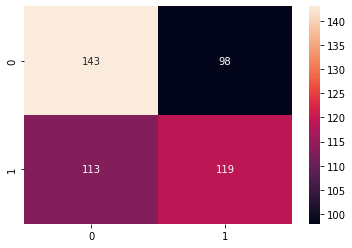

In [177]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")

In [178]:
import xgboost as xgb
model_xgboost = xgb.XGBClassifier()

model_xgboost.fit(train_images, train_labels)


# Predicting the Test set results
y_pred = model_xgboost.predict(test_images)

In [179]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, y_pred)


print("Accuracy = ", (accuracy * 100.0), "%")

Accuracy =  60.25369978858352 %


<AxesSubplot:>

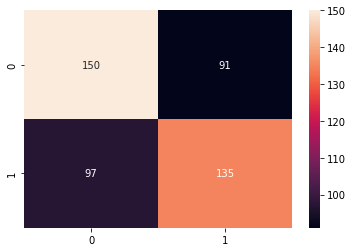

In [180]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")